In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\jeremiah.v.pratt\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
NUM_FEATURES = 9
BATCH_SIZE = 32
NUM_BATCHES = 500

class Data(object):
    def __init__(self):
        num_samp = 50
        sigma = 0.1
        np.random.seed(31415)


        self.index = np.arange(num_samp)        
        self.x = np.random.uniform(size=(num_samp))
        self. y = np.sin(2*np.pi*self.x) + np.random.normal(0,sigma,num_samp)
        
    def get_batch(self):
        choices = np.random.choice(self.index, size=BATCH_SIZE)

        return self.x[choices], self.y[choices].flatten()


def f(x):
    w = tf.get_variable('w', [NUM_FEATURES, 1], tf.float32,
                        tf.random_normal_initializer())
    b = tf.get_variable('b', [], tf.float32, tf.zeros_initializer())
    mu = tf.get_variable('mu', [NUM_FEATURES, 1], tf.float32, tf.random_normal_initializer())
    sig = tf.get_variable('sig', [NUM_FEATURES, 1], tf.float32, tf.random_normal_initializer())

    return tf.squeeze(tf.matmul(tf.transpose(w),tf.exp(-tf.pow(x-mu, 2)/tf.pow(sig,2))) + b)


x = tf.placeholder(tf.float32, [BATCH_SIZE])
y = tf.placeholder(tf.float32, [BATCH_SIZE])
y_hat = f(x)

loss = tf.reduce_mean((1/2)*(tf.pow(y_hat - y, 2)))
optim = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

data = Data()

for _ in range(0, NUM_BATCHES):
    x_np, y_np = data.get_batch()
    loss_np, _ = sess.run([loss, optim], feed_dict={x: x_np, y: y_np})

learned = []
print("Parameter estimates:")
for var in tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES):
    print(
        var.name.rstrip(":0"),
        np.array_str(np.array(sess.run(var)).flatten(), precision=3))
    
    learned.append(np.array(sess.run(var)).flatten().tolist())

Parameter estimates:
w [-2.52  -0.043  0.655 -1.29   1.09   1.378  0.37  -0.925  0.715]
b [0.07]
mu [ 1.373 -0.614  0.212 -0.569  0.279  1.006  0.824 -1.415 -1.174]
sig [ 1.186  0.21   0.695 -0.519  0.213 -0.151  1.146  0.094  0.805]


In [3]:
def plotTrue(ax):
    
    x = np.linspace(0,1)
    y = np.sin(2*np.pi*x)
    ax.plot(x,y,color='green',label='True Function')

In [4]:
def plotPoints(ax):
    
    ax.scatter(data.x,data.y,label='Observations')

In [5]:
def plotPred(ax):
    
    xt = np.linspace(0,1,32)
    y = sess.run(y_hat, feed_dict={x:xt})
    ax.plot(xt,y,color='blue',label='Predicted Function')

In [6]:
def plotBases(ax):
    
    x = np.linspace(0,1)
    for i in range(NUM_FEATURES):
        y = (learned[0][i]*np.exp(-(x-learned[2][i])**2/learned[3][i]**2)) + learned[1]
        ax.plot(x,y)

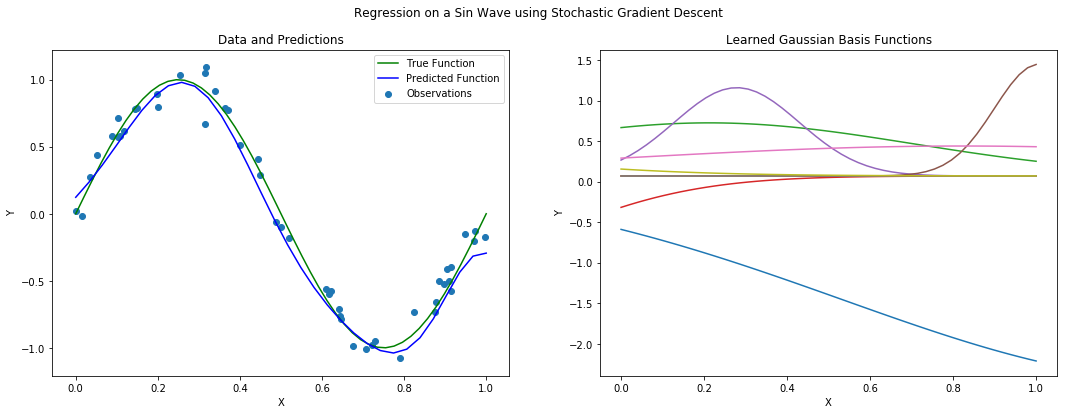

In [7]:
fig, axarr = plt.subplots(nrows=1, ncols=2, figsize = [18,6])
plotTrue(axarr[0])
plotPoints(axarr[0])
plotPred(axarr[0])
plotBases(axarr[1])
axarr[0].legend()
axarr[0].title.set_text('Data and Predictions')
axarr[0].set(xlabel='X',ylabel='Y')
axarr[1].set(xlabel='X',ylabel='Y')
axarr[1].title.set_text('Learned Gaussian Basis Functions')
plt.suptitle('Regression on a Sin Wave using Stochastic Gradient Descent')
plt.show()